In [119]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
dfr = pd.read_csv('RecipeNLG_dataset.csv')

In [6]:
dfr.head(5)

Unnamed: 0                  title  \
0           0    No-Bake Nut Cookies   
1           1  Jewell Ball'S Chicken   
2           2            Creamy Corn   
3           3          Chicken Funny   
4           4   Reeses Cups(Candy)     

                                         ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4  ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   
2   www.cookbooks.com/Recipe-Details.aspx?id=10570  Gathered   
3  www.cookbooks.com/Recipe-Details.aspx?id=897570  Gathered   
4  www.cookbooks.com/Recipe-Details.aspx?id=659239  Gathered   

                                                 NER  
0  ["brown sugar", "milk", "vanilla", "nuts", "bu...  
1  ["beef", "chicken breasts", "cream of mushroom...  
2  ["frozen corn", "cream cheese", "butter", "gar...  
3  ["chicken", "chicken gravy", "cream of mushroo...  
4  ["peanut butter", "graham cracker crumbs", "bu...

**NOTES**:

Add nutritional information, need a decision between granular and approx. or avg per dish. (quantities can vary)
therefore standard quantities will also standardize your outcome a bit.  


In [87]:
# Load the datasets
sample1 = pd.read_csv('raw_recipes.csv')
sample2 = pd.read_csv('raw_interactions.csv')


#Inter_data = pd.to_pickle('raw_interactions.csv')

#obj = pd.read_pickle(r'filepath')


In [88]:
ingre = pd.read_pickle('ingr_map.pkl')

In [89]:
ingre

raw_ingr  \
0      medium heads bibb or red leaf lettuce, washed, dried* and torn into pieces   
1                                           mixed baby lettuces and spring greens   
2                                                            romaine lettuce leaf   
3                                                            iceberg lettuce leaf   
4                                                             red romaine lettuce   
...                                                                           ...   
11654                                                                    soybeans   
11655                                                                       goose   
11656                                                                      ajwain   
11657                                                                    brinjals   
11658                                                                       khoya   

       raw_words  \
0             13   
1              6   
2              3   
3              3   
4              3   
...          ...   
11654          1   
11655          1   
11656          1   
11657          1   
11658          1   

                                                                       processed  \
0      medium heads bibb or red leaf lettuce, washed, dried* and torn into piece   
1                                           mixed baby lettuces and spring green   
2                                                           romaine lettuce leaf   
3                                                           iceberg lettuce leaf   
4                                                            red romaine lettuce   
...                                                                          ...   
11654                                                                    soybean   
11655                                                                      goose   
11656                                                                     ajwain   
11657                                                                    brinjal   
11658                                                                      khoya   

       len_proc replaced  count    id  
0            73  lettuce   4507  4308  
1            36  lettuce   4507  4308  
2            20  lettuce   4507  4308  
3            20  lettuce   4507  4308  
4            19  lettuce   4507  4308  
...         ...      ...    ...   ...  
11654         7  soybean     31  6702  
11655         5    goose      8  3318  
11656         6   ajwain     13    47  
11657         7  brinjal      2   750  
11658         5    khoya      6  4061  

[11659 rows x 7 columns]

In [81]:
# Perform basic EDA
print(sample1.describe())
print(sample1.isnull().sum())
print(sample1.dtypes)



                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499   
std    141206.635626  4.461963e+06    9.979141e+07       5.995128   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%     99944.000000  2.000000e+01    5.690500e+04       6.000000   
50%    207249.000000  4.000000e+01    1.736140e+05       9.000000   
75%    333816.000000  6.500000e+01    3.982750e+05      12.000000   
max    537716.000000  2.147484e+09    2.002290e+09     145.000000   

       n_ingredients  
count  231637.000000  
mean        9.051153  
std         3.734796  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps   

In [82]:
print(sample2.describe())
print(sample2.isnull().sum())
print(sample2.dtypes)



            user_id     recipe_id        rating
count  1.132367e+06  1.132367e+06  1.132367e+06
mean   1.384291e+08  1.608972e+05  4.411016e+00
std    5.014269e+08  1.303987e+05  1.264752e+00
min    1.533000e+03  3.800000e+01  0.000000e+00
25%    1.354700e+05  5.425700e+04  4.000000e+00
50%    3.309370e+05  1.205470e+05  5.000000e+00
75%    8.045500e+05  2.438520e+05  5.000000e+00
max    2.002373e+09  5.377160e+05  5.000000e+00
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


In [132]:
sample1

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                                                                                                                                                                                                                                                                                                                                                                                                          tags  \
0                                                                                                                                                                   ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']   
1                                                                                                                                                             ['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']   
2                                                                                                                                                                                                                                                                                                          ['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']   
3       ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']   
4                                                                                            ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']   
...                                                                                                           

In [84]:
a = pd.DataFrame(sample1['nutrition'].str.strip('[]').str.replace(',', '').str.split().to_list())

In [98]:
a.columns = ['Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)', 'Sodium (PDV)', 'Protein (PDV)', 'Saturated Fat', 'Carbohydrates (PDV)'] 
#calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat

In [99]:
a

Calories (#) Total Fat (PDV) Sugar (PDV) Sodium (PDV) Protein (PDV)  \
0              51.5             0.0        13.0          0.0           2.0   
1             173.4            18.0         0.0         17.0          22.0   
2             269.8            22.0        32.0         48.0          39.0   
3             368.1            17.0        10.0          2.0          14.0   
4             352.9             1.0       337.0         23.0           3.0   
...             ...             ...         ...          ...           ...   
231632        415.2            26.0        34.0         26.0          44.0   
231633         14.8             0.0         2.0         58.0           1.0   
231634         59.2             6.0         2.0          3.0           6.0   
231635        188.0            11.0        57.0         11.0           7.0   
231636        174.9            14.0        33.0          4.0           4.0   

       Saturated fat Carbohydrates (PDV)  
0                0.0                 4.0  
1               35.0                 1.0  
2               27.0                 5.0  
3                8.0                20.0  
4                0.0                28.0  
...              ...                 ...  
231632          21.0                15.0  
231633           0.0                 1.0  
231634           5.0                 0.0  
231635          21.0                 9.0  
231636          11.0                 6.0  

[231637 rows x 7 columns]

In [110]:
c = sample1.drop(columns = ['nutrition'])

In [111]:
b = c.join(a)

In [113]:
food_nutrition = b.copy()

In [118]:
food_nutrition

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                                                                                                                                                                                                                                                                                                                                                                                                          tags  \
0                                                                                                                                                                   ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']   
1                                                                                                                                                             ['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']   
2                                                                                                                                                                                                                                                                                                          ['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']   
3       ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']   
4                                                                                            ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']   
...                                                                                                           

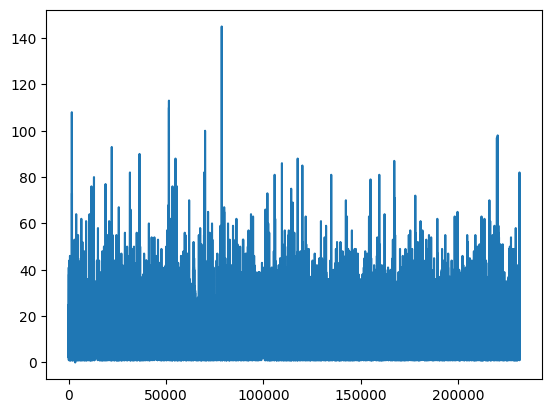

In [115]:
food_nutrition["n_steps"].plot()
plt.show()

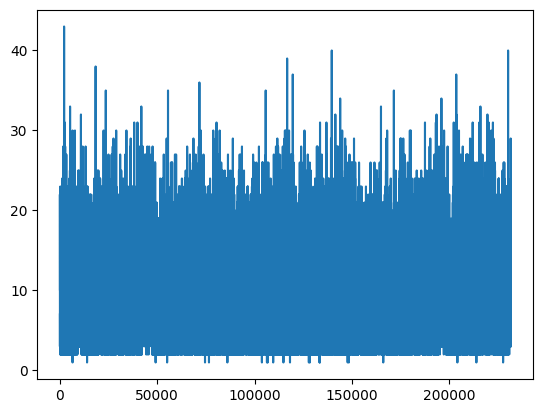

In [117]:
food_nutrition["n_ingredients"].plot()
plt.show()

In [180]:
n = pd.DataFrame(food_nutrition['ingredients'].str.replace(',', '').str.strip('[]').str.split().to_list())

In [182]:
n = food_nutrition['ingredients'].str.replace(',', '').str.strip('[]').str.split()

In [183]:
n

0                                                                                                                                                                                                                                                                                     ['winter, squash', 'mexican, seasoning', 'mixed, spice', 'honey', 'butter', 'olive, oil', 'salt']
1                                                                                                                                                                                                                                                                                           ['prepared, pizza, crust', 'sausage, patty', 'eggs', 'milk', 'salt, and, pepper', 'cheese']
2                                                                                                                                                                           ['ground, beef', 'yellow, onions', 'diced, tomatoes', 'tomato, paste', 'toma

In [192]:
n = food_nutrition['ingredients'].str.get_dummies(sep="'")

KeyboardInterrupt: 

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

In [201]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split("'"), max_features=500)

n = vectorizer.fit_transform(food_nutrition["ingredients"])

In [200]:
n.toarray()

array([[ 0,  0,  6, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  1,  0,  0],
       ...,
       [ 0,  0,  7, ...,  0,  0,  0],
       [ 0,  0,  9, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0]])

In [202]:
vectorizer.get_feature_names_out()

array(['active', 'adobo', 'all', 'allspice', 'almond', 'almonds',
       'american', 'and', 'angel', 'apple', 'apples', 'applesauce',
       'apricot', 'artichoke', 'asparagus', 'avocado', 'avocados', 'baby',
       'bacon', 'baking', 'balsamic', 'banana', 'bananas', 'barbecue',
       'barley', 'basil', 'bay', 'bean', 'beans', 'beef', 'beer', 'bell',
       'biscuits', 'bisquick', 'bittersweet', 'black', 'blend', 'blue',
       'blueberries', 'boiled', 'boiling', 'boneless', 'bouillon', 'bran',
       'brandy', 'bread', 'breadcrumbs', 'breast', 'breasts', 'broccoli',
       'broth', 'brown', 'buns', 'butter', 'buttermilk', 'butternut',
       'butterscotch', 'button', 'cabbage', 'cajun', 'cake', 'candy',
       'canned', 'canola', 'capers', 'caraway', 'cardamom', 'carrot',
       'carrots', 'cashews', 'caster', 'cauliflower', 'cayenne', 'celery',
       'cereal', 'cheddar', 'cheese', 'cherries', 'cherry', 'chestnuts',
       'chicken', 'chickens', 'chickpeas', 'chile', 'chiles', 'chil

In [179]:
for ingredient_list in n['ingredients']:
    ingredient_list_specific = ingredient_list
    new_ingredient = ingredient_list[0]
    print(new_ingredient)

'winter
'prepared
'ground
'spreadable
'tomato
'milk'
'fennel
'pork
'chocolate
'sugar'
'whole
'vanilla
'great
'collard
'gentian
'lean
'egg
'butterscotch
'celery'
'canola
'water'
'onion'
'boneless
'all-purpose
'butter'
'ground
'vegetarian
'beef
'red
'unsalted
'butter'
'ground
'butter'
'ground
'milk'
'low
'frozen
'red
'frozen
'ground
'angel
'all-purpose
'all-purpose
'ground
'tri-color
'frozen
'sandwich
'shortening'
'yellow
'whole
'flour'
'italian
'eggs'
'rolls'
'stewed
'beef
'flour'
'tomatoes'
'fresh
'fresh
'fettuccine
'frozen
'lemon
'unflavored
'veal
'tomatoes'
'ciabatta'
'whipping
'gelatin'
'carrots'
'sweet
'all-purpose
'unsweetened
'vermicelli'
'philadelphia
'boneless
'baking
'onion'
'light
'bacon'
'apples'
'elbow
'flour'
'eggs'
'white
'boneless
'cream
'onion'
'ground
'soft
'shortening'
'boneless
'beef
'green
'betty
'butter'
'oreo
'banana'
'cream
"mccormick's
'cucumber'
'whole
'limeade'
'flour'
'ground
'squid'
'flour'
'pork
'whole
'wild
'rice
'bittersweet
'dr.
'fish'
'butter'
'white
's

'red
'sirloin
'lean
'chicken
'chicken
'dried
'hamburger'
'ground
'pinto
'lean
'pizza
'potatoes'
'bulk
'egg
'ground
'ground
'lean
'cornmeal'
'lean
'pork
'pork
'white
'boneless
'boneless
'boneless
'plain
'pork
'pork
'pork
'boneless
'pork
'boneless
'lean
'pork
'boneless
'pork
'pork
'pork
'butter'
'pork
'pork
'pork
'brown
'vegetable
'pork
'pork
'boneless
'pork
'rosemary'
'pork
'boneless
'boneless
'potatoes'
'pork
'pork
'boneless
'pork
'pork
'herb-seasoned
'pork
'pork
'boneless
'boneless
'pork
'oil'
'pork
'pork
'pork
'pork
'sweet
'pork
'pork
'pork
'apple'
'pork
'boneless
'lean
'country-style
'boneless
'potatoes'
'beef
'boneless
'smoked
'potatoes'
'potatoes'
'potatoes'
'potatoes'
'frozen
'raw
'potatoes'
'potatoes'
'chicken
'potatoes'
'dried
'polish
'potatoes'
'butter'
'lean
'pierogies'
"devil's
'boneless
'vegetable
'boneless
'boneless
'boneless
'boneless
'skinless
'boneless
'granulated
'solid
'milk'
'frozen
'rabbit'
'bread'
'vegetable
'pork
'small
'pork
'beef
'olive
'black
'garlic'
'dry
'cor

'olive
'ground
'white
'ground
'ground
'ground
'cooking
'onion'
'vegetable
'dried
'onion'
'lamb'
'soy
'boneless
'stewed
'fresh
'lamb'
'lamb
'arugula'
'potatoes'
'boneless
'cooked
'lamb'
'ground
'olive
'canola
'olive
'lamb
'lamb
'ground
'whole
'leg
'boneless
'lamb'
'plain
'egg'
'fresh
'ground
'ground
'lamb'
'lamb
'shoulder
'lamb'
'garlic
'potatoes'
'liquid
'lamb
'lamb
'lamb
'russet
'lamb
'lamb
'lamb
'lamb
'lamb
'fresh
'olive
'lamb
'lamb
'butter'
'lamb
'flat
'bread'
'garlic
'lamb
'lamb
'lamb
'lamb
'dried
'lamb
'lamb
'cilantro
'dried
'lamb
'basmati
'lamb
'butter'
'lamb
'water'
'lamb
'lamb
'olive
'lamb
'shoulder
'middle
'lamb
'lamb
'fresh
'shoulder
'of
'olive
'butter'
'orzo
'lamb
'lamb
'black
'lamb
'peanut
'lamb
'shoulder
'lamb
'vegetable
'eggs'
'red
'plain
'fennel
'lean
'lamb'
'light
'sweet
'lamb
'greek
'onions'
'lamb'
'lamb
'leg
'flour'
'low
'zucchini'
'onion'
'vegetable
'lamb'
'lamb
'lamb'
'lamb
'butter'
'garlic
'lean
'olive
'of
'lamb'
'ground
'oil'
'lean
'lean
'plain
'onions'
'boneless


'chicken
'cooked
'butter'
'low
'marinated
'basmati
'brown
'uncooked
'boneless
'chickpeas'
'raw
'instant
'eggs'
'red
'long-grain
'onion'
'onion'
'olive
'long-grain
'long
'olive
'coconut
'canola
'egg'
'lean
'butter'
'flour'
'rice
'monterey
'white
'rice'
'cooked
'cooked
'cream
'chicken
'olive
'rice'
'white
'long-grain
'white
'cooked
'italian
'steamed
'short-grain
'long
'applesauce'
'butter'
'butter'
'rice
'breadcrumbs'
'rice
'basmati
'rice
'medium
'ground
'margarine'
'sesame
'cooked
'nutmeg'
'rice
'brown
'sour
'cooked
'chicken
'olive
'coconut
'oil'
'olive
'campbell
'water'
'white
'flour'
'brown
'head
'flour'
'chicken
'all-purpose
'garlic
'wild
'white
'white
'rice'
'chicken
'mushroom
'elbow
'rice'
'butter'
'bell
'onion'
'cornmeal'
'polenta'
'potatoes'
'white
'white
'egg'
'raw
'long
'steel
'long
'pearl
'wild
'basmati
'uncooked
'rice
'margarine'
'butter'
'cooked
'cooked
'eggs'
'rice'
'rice'
'long-grain
'olive
'butter'
'rice
'butter'
'chicken
'rice
'rice
'brown
'brown
'rice
'rice
'rice
'butte

'red
'bacon'
'catfish
'water'
'garlic'
'tomato
'fine
'rice'
'cucumbers'
'prawns'
'day-old
'potatoes'
'potatoes'
'lean
'apples'
'ground
'green
'milk'
'matzos'
'zucchini'
'beef'
'water'
'ground
'steaks'
'collard
'collard
'rum'
'sugar'
'crushed
'yeast'
'active
'cold
'active
'water'
'yeast'
'whole
'flour'
'butter'
'whole
'whole
'all-purpose
'sweet
'flour'
'active
'all-purpose
'yeast'
'milk'
'flour'
'baking
'eggs'
'flour'
'all-purpose
'cornstarch'
'all-purpose
'butter'
'all-purpose
'active
'active
'yellow
'squash'
'eggs'
'egg
'tonic
'lime
'vodka'
'orange
'butter'
'dry
'yellow
'whole
'butter'
'heavy
'eggs'
'flour'
'sugar'
'eggs'
'vanilla
'saffron
'boneless
'cooked
'egg
'long-grain
'coconut
'extra
'yellow
'yellow
'cake
'unbleached
'vanilla
'oil'
'carrots'
'boneless
'coconut
'dried
'eggplant'
'rice
'coconut
'fresh
'mangoes'
'water'
'eggs'
'yellow
'split
'bacon'
'maize
'sugar'
'oil'
'prepared
'yellow
'yellow
'dried
'olive
'sherry
'yellow
'sun-dried
'onion'
'salt'
'yellow
'frozen
'long-grain
'bu

In [ ]:
for ingredient in 

In [137]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

In [138]:


# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
subcategory = pd.DataFrame(n['ingredients'])
encoded = ohe.fit_transform(subcategory)
encoded

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [122]:
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
ohe.categories_

[array(['["baker\'s angel flake sweetened coconut", \'shake-n-bake\', \'curry powder\', \'ground red pepper\', \'egg\', \'raw shrimp\', \'orange marmalade\', \'rice wine vinegar\', \'crushed red pepper flakes\']',
        '["baker\'s german\'s chocolate", \'butter\', \'cream cheese\', \'sugar\', \'egg\', \'all-purpose flour\', \'vanilla\', \'eggs\', \'baking powder\', \'salt\', \'unsifted all-purpose flour\', \'nuts\', \'almond extract\']',
        '["baker\'s german\'s chocolate", \'milk\', \'cream cheese\', \'sugar\', \'whipped topping\', \'graham cracker pie crust\']',
        ...,
        "['zwieback toast', 'butter', 'granulated sugar', 'cream cheese', 'eggs', 'egg yolks', 'lemon zest', 'fresh lemon juice', 'sour cream', 'vanilla', 'egg whites', 'sugar', 'strawberries', 'red currant jelly']",
        "['zwieback toast', 'granulated sugar', 'butter', 'cream cheese', 'brown sugar', 'eggs', 'pumpkin', 'pumpkin pie spice', 'heavy cream', 'walnuts']",
        "['zwieback toast', 'light

In [ ]:
food_nutrition.drop(columns = ['nutrition',])

In [114]:
food_nutrition

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                                                                                                                                                                                                                                                                                                                                                                                                          tags  \
0                                                                                                                                                                   ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']   
1                                                                                                                                                             ['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']   
2                                                                                                                                                                                                                                                                                                          ['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']   
3       ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']   
4                                                                                            ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']   
...                                                                                                           

In [56]:
sample2.head(20)

user_id  recipe_id        date  rating  \
0        38094      40893  2003-02-17       4   
1      1293707      40893  2011-12-21       5   
2         8937      44394  2002-12-01       4   
3       126440      85009  2010-02-27       5   
4        57222      85009  2011-10-01       5   
5        52282     120345  2005-05-21       4   
6       124416     120345  2011-08-06       0   
7   2000192946     120345  2015-05-10       2   
8        76535     134728  2005-09-02       4   
9       273745     134728  2005-12-22       5   
10      353911     134728  2006-09-26       5   
11      190375     134728  2007-03-09       5   
12      468945     134728  2008-02-20       0   
13      255338     134728  2008-04-11       5   
14     1171894     134728  2009-04-21       5   
15      136726     197160  2006-11-25       5   
16       68960     200236  2006-12-19       4   
17      618928     200236  2007-10-17       4   
18      217118     200236  2008-04-18       5   
19  2000049093     200236  2015-03-08       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!  
3                                                                                

Note 

In [20]:
sample1.head(5)

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                                                                                                                                                                                                                                                                                                                                                                                                     tags  \
0                                                                                                                                                              ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']   
1                                                                                                                                                        ['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']   
2                                                                                                                                                                                                                                                                                                     ['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']   
3  ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']   
4                                                                                       ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [17]:
pd.options.display.max_colwidth = 1000

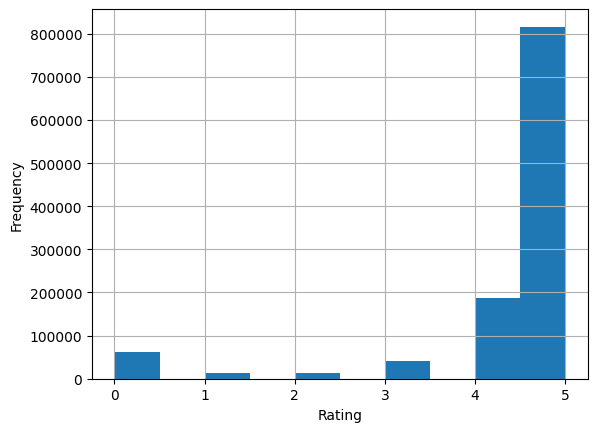

In [10]:
# Distribution of ratings
sample2['rating'].hist()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()




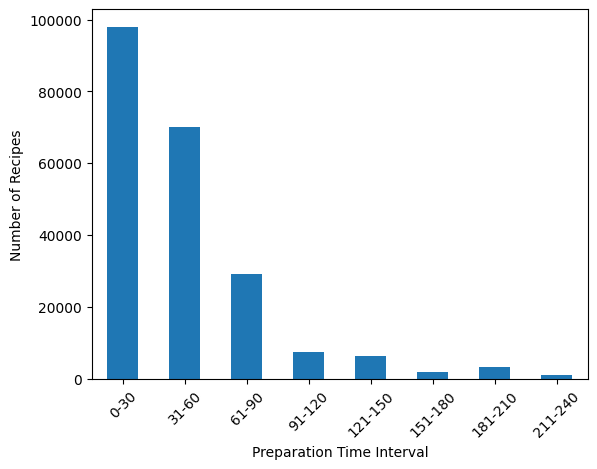

In [11]:
# Group preparation times by intervals
intervals = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240']
sample1['time_interval'] = pd.cut(sample1['minutes'], bins=intervals, labels=labels)

# Count the number of recipes in each time interval
count_per_interval = sample1['time_interval'].value_counts().sort_index()

# Bar chart of preparation times
count_per_interval.plot(kind='bar')
plt.xlabel("Preparation Time Interval")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Number of ratings per user
ratings_per_user = sample2['user_id'].value_counts()
ratings_per_user

424680        7671
37449         5603
383346        4628
169430        4076
128473        3917
              ... 
244983           1
139446           1
495446           1
113469           1
2001868099       1
Name: user_id, Length: 226570, dtype: int64

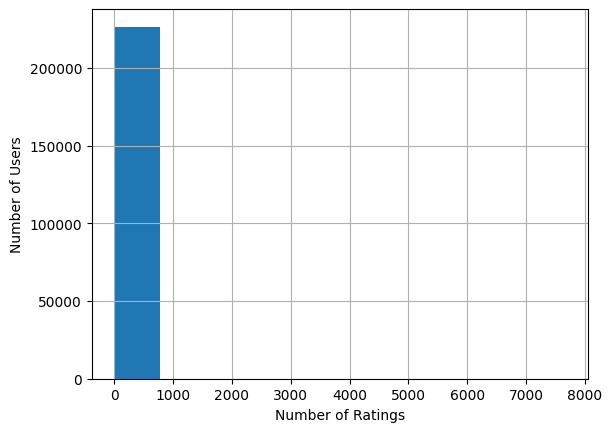

In [13]:
ratings_per_user.hist()
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

#needs groupby 

In [ ]:
# Number of ratings per recipe
ratings_per_recipe = sample2['recipe_id'].value_counts()
ratings_per_recipe.hist()
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Recipes")
plt.show()

In [14]:
# Distribution of tags and ingredients
tags = sample1['tags'].apply(pd.Series).stack().value_counts()
ingredients = sample1['ingredients'].apply(pd.Series).stack().value_counts()




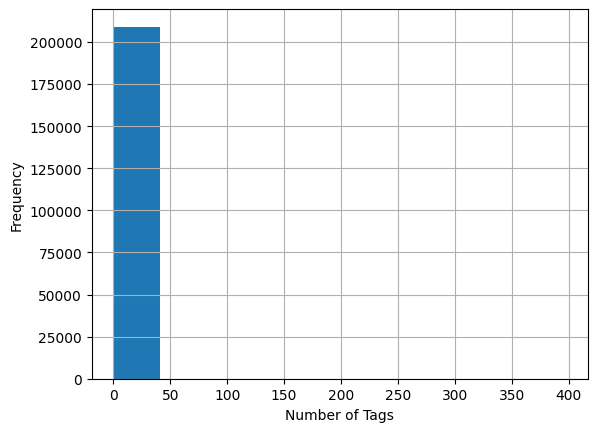

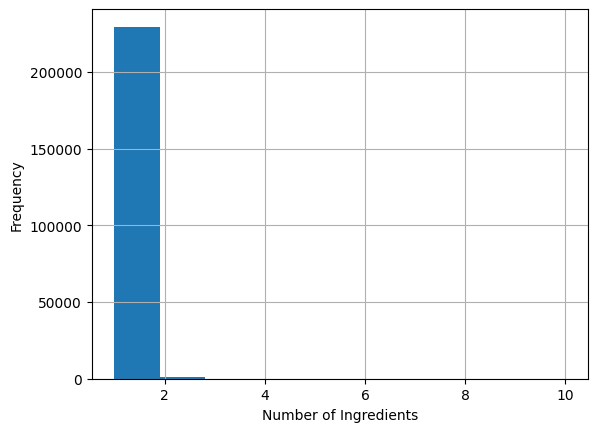

In [15]:
tags.hist()
plt.xlabel("Number of Tags")
plt.ylabel("Frequency")
plt.show()
#groupby what...

ingredients.hist()
plt.xlabel("Number of Ingredients")
plt.ylabel("Frequency")
plt.show()
#groupby what...


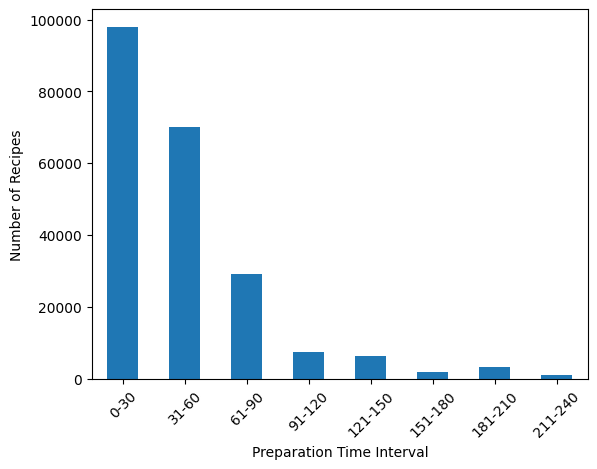

In [16]:

# Group preparation times by intervals
intervals = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240']
sample1['time_interval'] = pd.cut(sample1['minutes'], bins=intervals, labels=labels)

# Count the number of recipes in each time interval
count_per_interval = sample1['time_interval'].value_counts().sort_index()

# Bar chart of preparation times
count_per_interval.plot(kind='bar')
plt.xlabel("Preparation Time Interval")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)
plt.show()


In [31]:
grouped_prep_time

id
38        1485.0
39         265.0
40          35.0
41        1460.0
43         140.0
           ...  
537459      10.0
537485      45.0
537543      55.0
537671     135.0
537716      40.0
Name: minutes, Length: 231637, dtype: float64

In [22]:
simple_data = sample2.copy()
simple_data.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                                                                                                                                                                                          review  
0                                                                     Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.  
1  So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!  
2                                                                                                            This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!  
3                                                                                                                                           I made the Mexican topping and took it to bunko.  Everyone loved it.  
4                                                                                                                                      Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!

In [57]:
simple_data['rating'] = np.where(simple_data['rating'] >= 3, 1, 2)
simple_data.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       2   
1  1293707      40893  2011-12-21       2   
2     8937      44394  2002-12-01       2   
3   126440      85009  2010-02-27       2   
4    57222      85009  2011-10-01       2   

                                                                                                                                                                                                          review  
0                                                                     Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.  
1  So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!  
2                                                                                                            This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!  
3                                                                                                                                           I made the Mexican topping and took it to bunko.  Everyone loved it.  
4                                                                                                                                      Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!

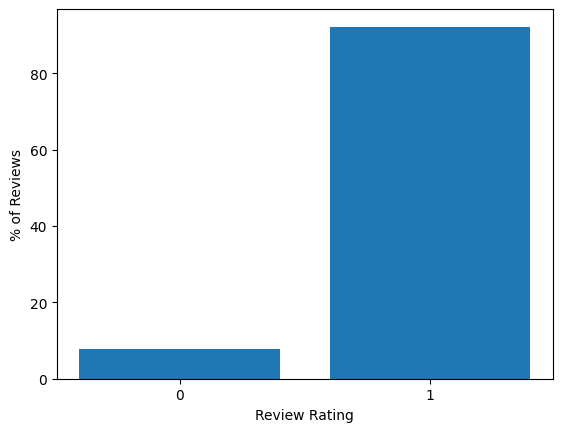

Class imbalance: [0.08 0.92]


In [26]:
values, counts = np.unique(simple_data['rating'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [34]:
# store simplified data in X and y
X = simple_data['review']
y = simple_data['rating']

In [35]:
review1 = 'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.'
review2 = 'So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didnt notice the missing 1/2 teaspoon!'
review3 = 'This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!'

small_reviews = pd.DataFrame({"Review": [review1, review2, review3]})
small_reviews

Review
0                                                                      Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1  So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didnt notice the missing 1/2 teaspoon!
2                                                                                                             This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!

In [47]:

small_reviews['Review'].str.split(' ')

0                                                                            [Great, with, a, salad., Cooked, on, top, of, stove, for, 15, minutes.Added, a, shake, of, cayenne, and, a, pinch, of, salt., Used, low, fat, sour, cream., Thanks.]
1    [So, simple,, so, delicious!, Great, for, chilly, fall, evening., Should, have, doubled, it, ;)<br/><br/>Second, time, around,, forgot, the, remaining, cumin., We, usually, love, cumin,, but, didnt, notice, the, missing, 1/2, teaspoon!]
2                                                                                                                           [This, worked, very, well, and, is, EASY., I, used, not, quite, a, whole, package, (10oz), of, white, chips., Great!]
Name: Review, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(small_reviews["Review"])

# 3. Transform
small_transformed = bagofwords.transform(small_reviews["Review"])
small_transformed

<3x62 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [50]:
bagofwords.get_feature_names()

/Users/giftysingh/opt/anaconda3/envs/R-tutorial/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10oz',
 '15',
 'added',
 'and',
 'around',
 'br',
 'but',
 'cayenne',
 'chilly',
 'chips',
 'cooked',
 'cream',
 'cumin',
 'delicious',
 'didnt',
 'doubled',
 'easy',
 'evening',
 'fall',
 'fat',
 'for',
 'forgot',
 'great',
 'have',
 'is',
 'it',
 'love',
 'low',
 'minutes',
 'missing',
 'not',
 'notice',
 'of',
 'on',
 'package',
 'pinch',
 'quite',
 'remaining',
 'salad',
 'salt',
 'second',
 'shake',
 'should',
 'simple',
 'so',
 'sour',
 'stove',
 'teaspoon',
 'thanks',
 'the',
 'this',
 'time',
 'top',
 'used',
 'usually',
 'very',
 'we',
 'well',
 'white',
 'whole',
 'with',
 'worked']

In [51]:
small_transformed.toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]])

In [52]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

10oz  15  added  and  around  br  but  cayenne  chilly  chips  ...  top  \
0     0   1      1    1       0   0    0        1       0      0  ...    1   
1     0   0      0    0       1   2    1        0       1      0  ...    0   
2     1   0      0    1       0   0    0        0       0      1  ...    0   

   used  usually  very  we  well  white  whole  with  worked  
0     1        0     0   0     0      0      0     1       0  
1     0        1     0   1     0      0      0     0       0  
2     1        0     1   0     1      1      1     0       1  

[3 rows x 62 columns]

In [53]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# size of training data
X_train.shape

(758685,)

In [55]:
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)


ValueError: np.nan is an invalid document, expected byte or unicode string.